In [540]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## stations
#### import stations, remove closed stations and change dates to datetime

In [541]:
stations = pd.read_csv('data/Seattle_cycles_station.csv')
stations.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [542]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         58 non-null     object 
 1   name               58 non-null     object 
 2   lat                58 non-null     float64
 3   long               58 non-null     float64
 4   install_date       58 non-null     object 
 5   install_dockcount  58 non-null     int64  
 6   modification_date  17 non-null     object 
 7   current_dockcount  58 non-null     int64  
 8   decommission_date  4 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


In [543]:
stations = stations[stations['current_dockcount'] > 0]

In [544]:
stations = stations.drop(['decommission_date','install_date', 'install_dockcount','modification_date'], axis=1)
stations.head()

,station_id,name,lat,long,current_dockcount
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,16
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,16
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,14
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,20


## trips
#### import trips, split start date and time and convert to datetime, remove duplicate trips

In [545]:
trips = pd.read_csv('data/Seattle_cycles_trip.csv')
trips.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\260303090.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('data/Seattle_cycles_trip.csv')


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washington St,CBD-06,PS-04,Member,Male,1960
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washington St,CBD-06,PS-04,Member,Male,1970
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washington St,CBD-06,PS-04,Member,Female,1988
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washington St,CBD-06,PS-04,Member,Female,1977
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washington St,CBD-06,PS-04,Member,Male,1971


In [546]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            286858 non-null  int64  
 1   starttime          286858 non-null  object 
 2   stoptime           286858 non-null  object 
 3   bikeid             286858 non-null  object 
 4   tripduration       286858 non-null  float64
 5   from_station_name  286858 non-null  object 
 6   to_station_name    286858 non-null  object 
 7   from_station_id    286858 non-null  object 
 8   to_station_id      286858 non-null  object 
 9   usertype           286858 non-null  object 
 10  gender             181558 non-null  object 
 11  birthyear          181554 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 26.3+ MB


In [547]:
trips['starttime'] = pd.to_datetime(trips['starttime'])
trips['start_date'] = trips['starttime'].dt.date
trips['start_date'] = pd.to_datetime(trips['start_date'])

In [548]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            286858 non-null  int64         
 1   starttime          286858 non-null  datetime64[ns]
 2   stoptime           286858 non-null  object        
 3   bikeid             286858 non-null  object        
 4   tripduration       286858 non-null  float64       
 5   from_station_name  286858 non-null  object        
 6   to_station_name    286858 non-null  object        
 7   from_station_id    286858 non-null  object        
 8   to_station_id      286858 non-null  object        
 9   usertype           286858 non-null  object        
 10  gender             181558 non-null  object        
 11  birthyear          181554 non-null  object        
 12  start_date         286858 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), 

In [549]:
trips.duplicated().sum()

25181

In [550]:
trips = trips.drop_duplicates()

In [551]:
trips.duplicated().sum()

0

In [552]:
trips = trips.drop(['starttime', 'stoptime', 'bikeid', 'tripduration', 'to_station_name', 'to_station_id', 'usertype', 'gender', 'birthyear'],axis=1)
trips = trips.reset_index(drop=True)

In [553]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261677 entries, 0 to 261676
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            261677 non-null  int64         
 1   from_station_name  261677 non-null  object        
 2   from_station_id    261677 non-null  object        
 3   start_date         261677 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 8.0+ MB


## merge stations and trips
#### extract month_year and day_of_week for each trip
#### groupby the number of trips per day per station 

In [554]:
df_merge_1 = pd.merge(left=stations, right=trips, left_on='station_id', right_on='from_station_id')
df_merge_1 = df_merge_1.drop(['from_station_name','from_station_id'], axis=1).rename(columns={'start_date':'Date'})
df_merge_1.head()

,station_id,name,lat,long,current_dockcount,trip_id,Date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,680,2014-10-13
1,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,692,2014-10-13
2,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,693,2014-10-13
3,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,753,2014-10-13
4,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,754,2014-10-13


In [555]:
df_merge_1['Month'] = df_merge_1['Date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_merge_1[['Month','trip_id']].groupby(['Month']).count().sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True)).reset_index().rename(columns={'trip_id': 'trip_count'})


,Month,trip_count
0,January,17669
1,February,17548
2,March,22654
3,April,24995
4,May,25244
5,June,26663
6,July,31477
7,August,29655
8,September,12673
9,October,16541


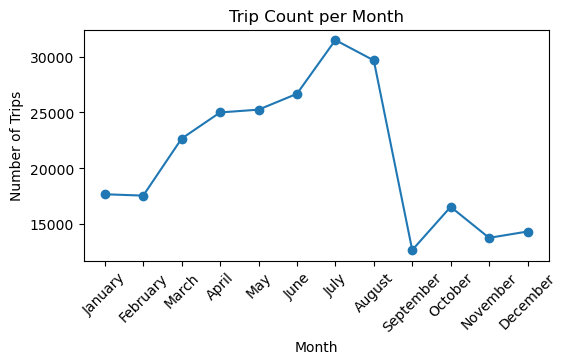

In [556]:
# Group by date and count the number of occurrences of 'trip_id'
count_per_month = df_merge_1[['Month','trip_id']].groupby(['Month']).count().sort_values(by='Month', key=lambda x: pd.Categorical(x, categories=month_order, ordered=True)).reset_index()

# Plotting the time series
plt.figure(figsize=(6, 3))
plt.plot(count_per_month['Month'], count_per_month['trip_id'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trip Count per Month')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [557]:
df_merge_1['Day_of_Week'] = df_merge_1['Date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_merge_1[['Day_of_Week','trip_id']].groupby(['Day_of_Week']).count().sort_values(by='Day_of_Week', key=lambda x: pd.Categorical(x, categories=day_order, ordered=True)).reset_index().rename(columns={'trip_id': 'trip_count'})

,Day_of_Week,trip_count
0,Monday,37369
1,Tuesday,38210
2,Wednesday,38497
3,Thursday,39265
4,Friday,38813
5,Saturday,32847
6,Sunday,28217


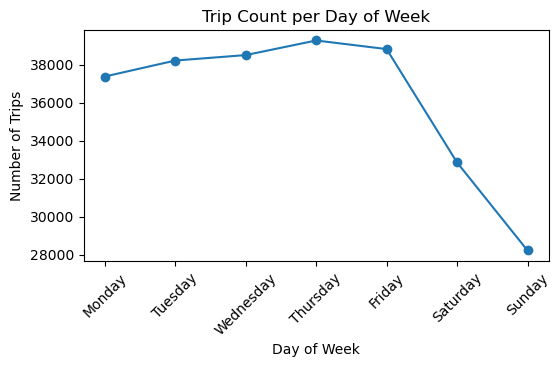

In [558]:
# Group by date and count the number of occurrences of 'trip_id'
count_per_day = df_merge_1[['Day_of_Week','trip_id']].groupby(['Day_of_Week']).count().sort_values(by='Day_of_Week', key=lambda x: pd.Categorical(x, categories=day_order, ordered=True)).reset_index()

# Plotting the time series
plt.figure(figsize=(6, 3))
plt.plot(count_per_day['Day_of_Week'], count_per_day['trip_id'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Trip Count per Day of Week')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

## Weather
#### import weather. change to datetime, try to impute missing gust speed values and fill nans in Events

In [559]:
pd.set_option('display.max_columns', 100)
weather = pd.read_csv('data/Seattle_weather_daily.csv')
weather.head(7)

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,10/13/2014,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,10/14/2014,63,59.0,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2,10/15/2014,62,58.0,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25,0.45,Rain
3,10/16/2014,71,61.0,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,-,0.00,Rain
4,10/17/2014,64,60.0,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,-,0.14,Rain
5,10/18/2014,68,64.0,59,59,57,55,90,83,68,29.96,29.90,29.80,10,8,2,10,4,-,0.31,Rain
6,10/19/2014,73,64.0,55,57,55,53,94,74,52,29.80,29.73,29.67,10,10,6,10,3,18,0.00,NaN


In [560]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        689 non-null    object 
 1   Max_Temperature_F           689 non-null    int64  
 2   Mean_Temperature_F          688 non-null    float64
 3   Min_TemperatureF            689 non-null    int64  
 4   Max_Dew_Point_F             689 non-null    int64  
 5   MeanDew_Point_F             689 non-null    int64  
 6   Min_Dewpoint_F              689 non-null    int64  
 7   Max_Humidity                689 non-null    int64  
 8   Mean_Humidity               689 non-null    int64  
 9   Min_Humidity                689 non-null    int64  
 10  Max_Sea_Level_Pressure_In   689 non-null    float64
 11  Mean_Sea_Level_Pressure_In  689 non-null    float64
 12  Min_Sea_Level_Pressure_In   689 non-null    float64
 13  Max_Visibility_Miles        689 non

In [561]:
weather['Events'] = weather['Events'].replace({'Rain-Thunderstorm':'Rain , Thunderstorm', 'Fog-Rain': 'Fog , Rain', 'Rain-Snow': 'Rain , Snow'})

In [562]:
weather['Events'] = weather['Events'].fillna('Clear')


In [563]:
weather[weather['Mean_Temperature_F'].isna()]

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
489,2/14/2016,55,NaN,55,50,50,50,82,82,82,30.12,30.12,30.12,10,10,10,23,23,NaN,0.0,Clear


In [564]:
weather['Mean_Temperature_F'] = weather['Mean_Temperature_F'].fillna(55.0)

In [565]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [566]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        689 non-null    datetime64[ns]
 1   Max_Temperature_F           689 non-null    int64         
 2   Mean_Temperature_F          689 non-null    float64       
 3   Min_TemperatureF            689 non-null    int64         
 4   Max_Dew_Point_F             689 non-null    int64         
 5   MeanDew_Point_F             689 non-null    int64         
 6   Min_Dewpoint_F              689 non-null    int64         
 7   Max_Humidity                689 non-null    int64         
 8   Mean_Humidity               689 non-null    int64         
 9   Min_Humidity                689 non-null    int64         
 10  Max_Sea_Level_Pressure_In   689 non-null    float64       
 11  Mean_Sea_Level_Pressure_In  689 non-null    float64       

### impute missing values in gust_speed col using IterativeImputer

In [567]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [568]:
df = weather.drop(['Events','Date'], axis=1)

In [569]:
df['Max_Gust_Speed_MPH'].unique()

array(['21', '17', '25', '-', '18', '22', '41', '30', '24', '20', '37',
       '16', '33', '28', '29', '32', '26', '38', '46', '23', '31', '36',
       '34', '39', nan, '52'], dtype=object)

In [570]:
df['Max_Gust_Speed_MPH'] = df['Max_Gust_Speed_MPH'].replace({'-':None})

In [571]:
df['Max_Gust_Speed_MPH'].unique()

array(['21', '17', '25', None, '18', '22', '41', '30', '24', '20', '37',
       '16', '33', '28', '29', '32', '26', '38', '46', '23', '31', '36',
       '34', '39', nan, '52'], dtype=object)

In [572]:
df['Max_Gust_Speed_MPH'] = df['Max_Gust_Speed_MPH'].astype(float)

In [573]:
df.head()

,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_Pressure_In,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In
0,71,62.0,54,55,51,46,87,68,46,30.03,29.79,29.65,10,10,4,13,4,21.0,0.00
1,63,59.0,55,52,51,50,88,78,63,29.84,29.75,29.54,10,9,3,10,5,17.0,0.11
2,62,58.0,54,53,50,46,87,77,67,29.98,29.71,29.51,10,9,3,18,7,25.0,0.45
3,71,61.0,52,49,46,42,83,61,36,30.03,29.95,29.81,10,10,10,9,4,NaN,0.00
4,64,60.0,57,55,51,41,87,72,46,29.83,29.78,29.73,10,10,6,8,3,NaN,0.14


In [574]:
it = IterativeImputer()
it.fit_transform(df)

array([[71.        , 62.        , 54.        , ...,  4.        ,
        21.        ,  0.        ],
       [63.        , 59.        , 55.        , ...,  5.        ,
        17.        ,  0.11      ],
       [62.        , 58.        , 54.        , ...,  7.        ,
        25.        ,  0.45      ],
       ...,
       [81.        , 68.        , 55.        , ...,  4.        ,
        16.85153317,  0.        ],
       [70.        , 64.        , 57.        , ...,  9.        ,
        18.        ,  0.        ],
       [71.        , 65.        , 59.        , ...,  8.        ,
        23.46675612,  0.        ]])

In [575]:
df2 = pd.DataFrame(it.fit_transform(df))

In [576]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,71.0,62.0,54.0,55.0,51.0,46.0,87.0,68.0,46.0,30.03,29.79,29.65,10.0,10.0,4.0,13.0,4.0,21.000000,0.00
1,63.0,59.0,55.0,52.0,51.0,50.0,88.0,78.0,63.0,29.84,29.75,29.54,10.0,9.0,3.0,10.0,5.0,17.000000,0.11
2,62.0,58.0,54.0,53.0,50.0,46.0,87.0,77.0,67.0,29.98,29.71,29.51,10.0,9.0,3.0,18.0,7.0,25.000000,0.45
3,71.0,61.0,52.0,49.0,46.0,42.0,83.0,61.0,36.0,30.03,29.95,29.81,10.0,10.0,10.0,9.0,4.0,15.840354,0.00
4,64.0,60.0,57.0,55.0,51.0,41.0,87.0,72.0,46.0,29.83,29.78,29.73,10.0,10.0,6.0,8.0,3.0,14.273680,0.14


In [577]:
weather['Max_Gust_Speed_MPH'] = df2[17].round(2)

In [578]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        689 non-null    datetime64[ns]
 1   Max_Temperature_F           689 non-null    int64         
 2   Mean_Temperature_F          689 non-null    float64       
 3   Min_TemperatureF            689 non-null    int64         
 4   Max_Dew_Point_F             689 non-null    int64         
 5   MeanDew_Point_F             689 non-null    int64         
 6   Min_Dewpoint_F              689 non-null    int64         
 7   Max_Humidity                689 non-null    int64         
 8   Mean_Humidity               689 non-null    int64         
 9   Min_Humidity                689 non-null    int64         
 10  Max_Sea_Level_Pressure_In   689 non-null    float64       
 11  Mean_Sea_Level_Pressure_In  689 non-null    float64       

## Checking for correlation in Weather data columns

C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\3840240055.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather.corr(method='pearson'),


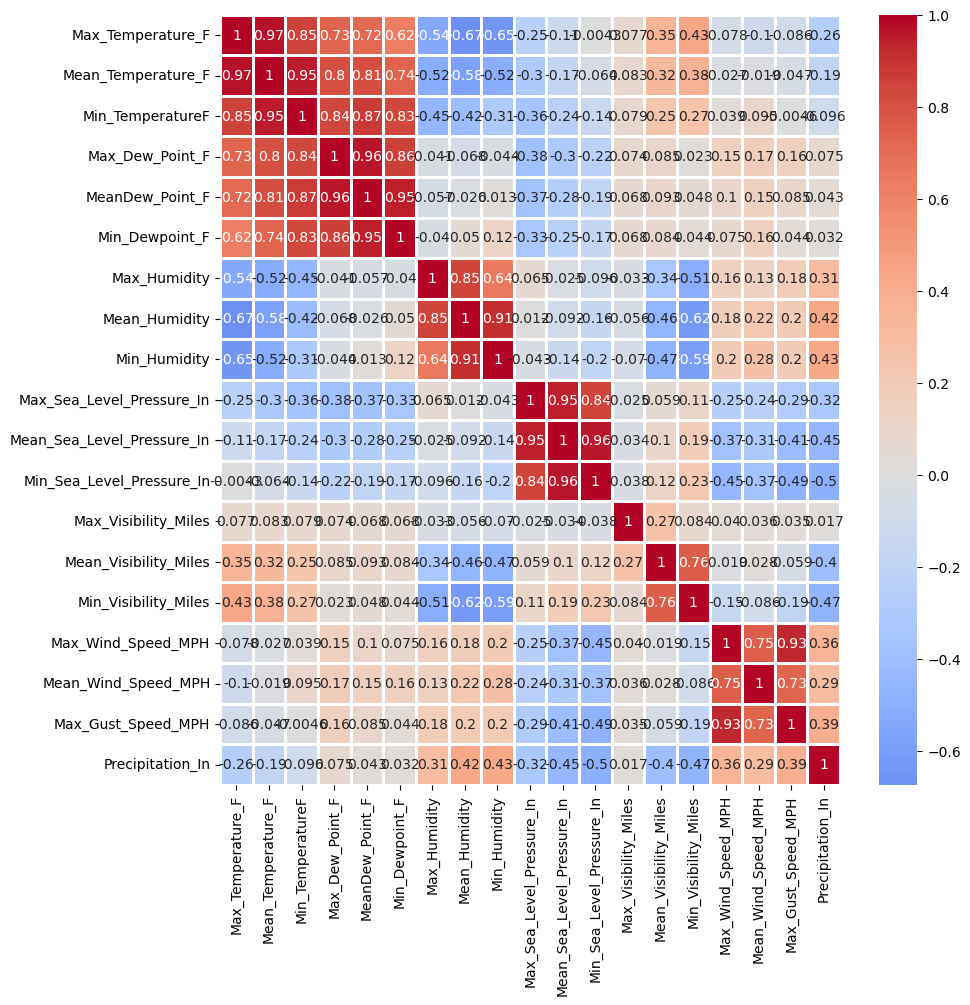

In [579]:
import seaborn as sns
fig, ax =  plt.subplots(figsize = (10,10))

# Note: there is an exercise sheet on Matplot lib which you may find useful in understanding about figures and axes

# Plotting the heatmap on the axes
sns.heatmap(weather.corr(method='pearson'), 
            annot=True, 
            linewidths=0.8,
            cmap='coolwarm',
            center=0.0,
            ax=ax);

In [580]:
weather = weather[['Date','Mean_Temperature_F','Mean_Sea_Level_Pressure_In','Mean_Visibility_Miles','Mean_Wind_Speed_MPH','Precipitation_In','Events']]

C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\4278275620.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(weather.corr(method='pearson'),


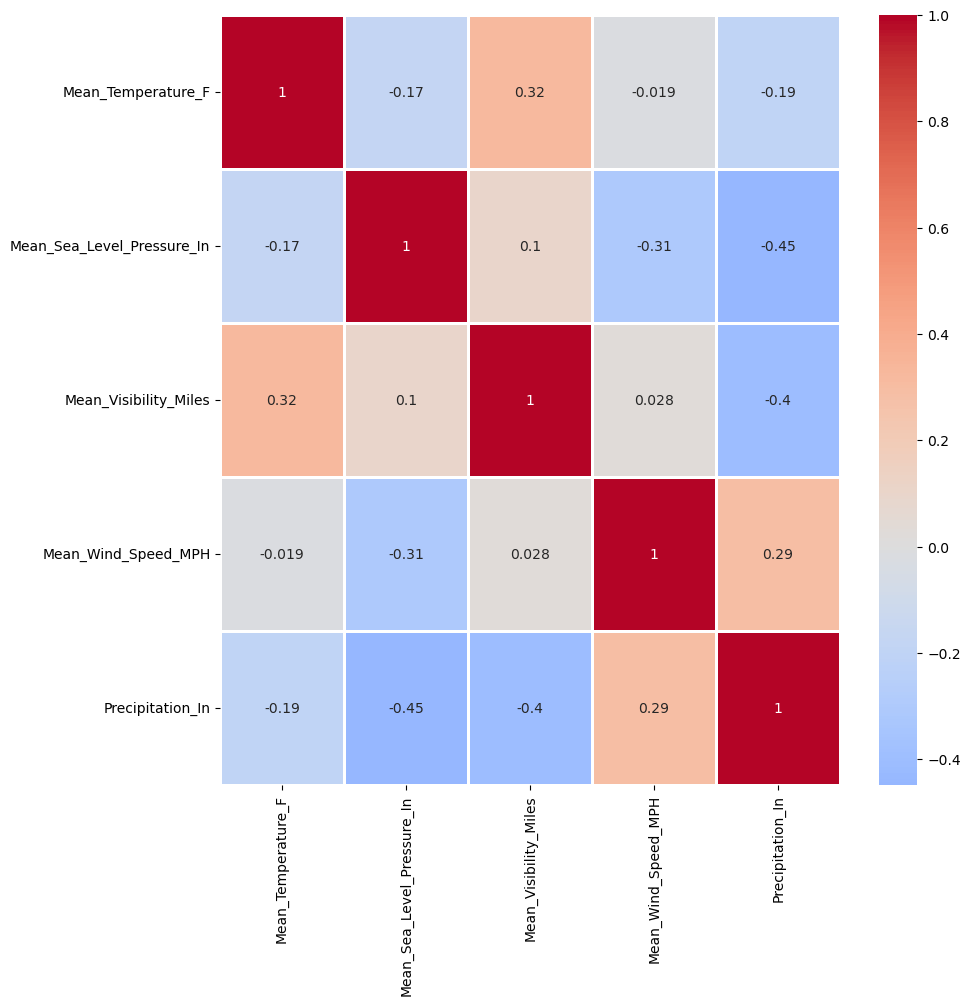

In [581]:
fig, ax =  plt.subplots(figsize = (10,10))

# Note: there is an exercise sheet on Matplot lib which you may find useful in understanding about figures and axes

# Plotting the heatmap on the axes
sns.heatmap(weather.corr(method='pearson'), 
            annot=True, 
            linewidths=0.8,
            cmap='coolwarm',
            center=0.0,
            ax=ax);

### grouping the data by date and station 
- count the number of trips on each day for each station by grouping by date and by station and counting a column
- then merge that with the original weather df that contains weather info for each day

In [582]:
agg_df = df_merge_1[['Date','name','trip_id']].groupby(['Date','name']).count().reset_index()
agg_df.head()

,Date,name,trip_id
0,2014-10-13,12th Ave & E Denny Way,6
1,2014-10-13,12th Ave & E Mercer St,5
2,2014-10-13,12th Ave & NE Campus Pkwy,6
3,2014-10-13,15th Ave E & E Thomas St,11
4,2014-10-13,15th Ave NE & NE 40th St,3


In [583]:
agg_df = pd.merge(left=agg_df, right=weather, on='Date')
agg_df = agg_df.rename(columns={'trip_id':'trip_count'})
agg_df.head()

,Date,name,trip_count,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,Events
0,2014-10-13,12th Ave & E Denny Way,6,62.0,29.79,10,4,0.0,Rain
1,2014-10-13,12th Ave & E Mercer St,5,62.0,29.79,10,4,0.0,Rain
2,2014-10-13,12th Ave & NE Campus Pkwy,6,62.0,29.79,10,4,0.0,Rain
3,2014-10-13,15th Ave E & E Thomas St,11,62.0,29.79,10,4,0.0,Rain
4,2014-10-13,15th Ave NE & NE 40th St,3,62.0,29.79,10,4,0.0,Rain


In [584]:
agg_df['month_year'] = agg_df['Date'].dt.to_period('M')
agg_df['Day_of_Week'] = agg_df['Date'].dt.day_name()
# agg_df['Month'] = agg_df['Date'].dt.month_name()

In [585]:
agg_df = agg_df.sort_values('trip_count', ascending=False)
agg_df

,Date,name,trip_count,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,Events,month_year,Day_of_Week
33,2014-10-13,Occidental Park / Occidental Ave S & S Washington St,71,62.0,29.79,10,4,0.00,Rain,2014-10,Monday
7939,2015-04-18,Pier 69 / Alaskan Way & Clay St,69,57.0,30.31,10,2,0.00,Rain,2015-04,Saturday
13145,2015-08-09,Pier 69 / Alaskan Way & Clay St,66,72.0,29.96,10,5,0.00,Clear,2015-08,Sunday
8880,2015-05-09,Pier 69 / Alaskan Way & Clay St,66,66.0,30.06,10,2,0.00,Clear,2015-05,Saturday
10469,2015-06-13,Pier 69 / Alaskan Way & Clay St,63,64.0,30.07,10,3,0.00,Clear,2015-06,Saturday
...,...,...,...,...,...,...,...,...,...,...,...
27795,2016-06-29,Mercer St & 9th Ave N,1,65.0,30.18,10,5,0.00,Clear,2016-06,Wednesday
20582,2016-01-26,12th Ave & NE Campus Pkwy,1,50.0,30.24,9,4,0.27,Rain,2016-01,Tuesday
16006,2015-10-08,UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,1,64.0,30.09,9,1,0.00,Clear,2015-10,Thursday
20564,2016-01-25,NE Pacific St/UW Medical Center,1,45.0,30.23,10,2,0.00,Clear,2016-01,Monday


In [586]:
pd.set_option('display.max_colwidth', 50)
stations_zip = stations
stations_zip.head()


,station_id,name,lat,long,current_dockcount
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,16
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,16
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,14
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,20


In [587]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [588]:
from geopy.geocoders import Nominatim

# Create a geolocator object
geolocator = Nominatim(user_agent="my_geocoder")


stations_zip['zipcode'] = stations_zip.apply(lambda row: geolocator.reverse((row['lat'], row['long']), language='en').raw.get('address', {}).get('postcode', 'ZIP code not found'), axis=1)
stations_zip


,station_id,name,lat,long,current_dockcount,zipcode
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,98121
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,16,98121
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,16,98121
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,14,98121
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,20,98101
5,CBD-04,Union St & 4th Ave,47.609221,-122.335596,18,98101
6,CBD-05,1st Ave & Marion St,47.604058,-122.335800,20,98174
7,CBD-06,2nd Ave & Spring St,47.605950,-122.335768,18,98174
8,CBD-07,City Hall / 4th Ave & James St,47.603509,-122.330409,20,98104
9,CBD-13,2nd Ave & Pine St,47.610185,-122.339641,18,98121


In [589]:
pd.set_option('display.max_colwidth', 100)
stations_zip

,station_id,name,lat,long,current_dockcount,zipcode
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,98121
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,16,98121
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,16,98121
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,14,98121
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,20,98101
5,CBD-04,Union St & 4th Ave,47.609221,-122.335596,18,98101
6,CBD-05,1st Ave & Marion St,47.604058,-122.335800,20,98174
7,CBD-06,2nd Ave & Spring St,47.605950,-122.335768,18,98174
8,CBD-07,City Hall / 4th Ave & James St,47.603509,-122.330409,20,98104
9,CBD-13,2nd Ave & Pine St,47.610185,-122.339641,18,98121


In [590]:
stations_zip['zipcode'].unique()

array(['98121', '98101', '98174', '98104', '98102', '98112', '98122',
       '98191', '98109', '98105', '98015', '98195'], dtype=object)

In [591]:
# not on zipcode income list - 98174 (should be 98104), 98191 (should be 98122 and 98109 for Lake Union Park / Valley St & Boren Ave N), 98015 (should be 98102), 98195 ( should be 98105 )

In [592]:
stations_zip['zipcode'] = stations_zip['zipcode'].astype(int).replace({98174:98104, 98191:98122, 98015:98102, 98195:98105})
stations_zip = stations_zip.reset_index(drop=True)

In [593]:
stations_zip.iloc[35,5] = 98109

In [594]:
stations_zip.head()

,station_id,name,lat,long,current_dockcount,zipcode
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,98121
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,16,98121
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,16,98121
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,14,98121
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,20,98101


In [595]:
merged_zipcode_df = pd.merge(left=stations_zip, right= agg_df, on='name')
merged_zipcode_df.head()

,station_id,name,lat,long,current_dockcount,zipcode,Date,trip_count,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,Events,month_year,Day_of_Week
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,98121,2015-04-20,56,60.0,29.91,10,2,0.0,Rain,2015-04,Monday
1,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,98121,2015-07-03,56,80.0,29.90,10,4,0.0,Clear,2015-07,Friday
2,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,98121,2015-05-09,55,66.0,30.06,10,2,0.0,Clear,2015-05,Saturday
3,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,98121,2015-06-13,52,64.0,30.07,10,3,0.0,Clear,2015-06,Saturday
4,BT-01,3rd Ave & Broad St,47.618418,-122.350964,18,98121,2015-07-04,50,77.0,29.83,10,3,0.0,Clear,2015-07,Saturday


### import and merge income data per zipcode

In [596]:
cycle_stat_zipcode_income = pd.read_csv('data/cycle_stat_zipcode_income.csv')
cycle_stat_zipcode_income = cycle_stat_zipcode_income.drop('weighted_income', axis=1)
cycle_stat_zipcode_income.head()

,zip code,number of returns,number of dependents,number of elderly returns [3],weighted_av_income
0,98112,12340,4330,2900,109623
1,98121,10260,910,1170,104897
2,98101,8300,1010,1540,98283
3,98109,16660,2750,2170,96916
4,98102,16660,1690,1940,83605


In [597]:
merged_income_df = pd.merge(left=cycle_stat_zipcode_income, right=merged_zipcode_df, left_on='zip code', right_on = 'zipcode')
merged_income_df.head()

,zip code,number of returns,number of dependents,number of elderly returns [3],weighted_av_income,station_id,name,lat,long,current_dockcount,zipcode,Date,trip_count,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,Events,month_year,Day_of_Week
0,98112,12340,4330,2900,109623,CH-05,15th Ave E & E Thomas St,47.620712,-122.312805,16,98112,2015-04-21,33,56.0,29.98,9,3,0.16,Rain,2015-04,Tuesday
1,98112,12340,4330,2900,109623,CH-05,15th Ave E & E Thomas St,47.620712,-122.312805,16,98112,2015-04-16,30,52.0,30.34,10,2,0.00,Rain,2015-04,Thursday
2,98112,12340,4330,2900,109623,CH-05,15th Ave E & E Thomas St,47.620712,-122.312805,16,98112,2015-03-09,29,49.0,30.10,10,3,0.00,Clear,2015-03,Monday
3,98112,12340,4330,2900,109623,CH-05,15th Ave E & E Thomas St,47.620712,-122.312805,16,98112,2015-04-07,29,54.0,29.86,10,4,0.01,Rain,2015-04,Tuesday
4,98112,12340,4330,2900,109623,CH-05,15th Ave E & E Thomas St,47.620712,-122.312805,16,98112,2015-04-14,28,47.0,30.25,10,8,0.05,Rain,2015-04,Tuesday


In [598]:
merged_income_df.columns

Index(['zip code', 'number of returns', 'number of dependents',
       'number of elderly returns [3]', 'weighted_av_income', 'station_id',
       'name', 'lat', 'long', 'current_dockcount', 'zipcode', 'Date',
       'trip_count', 'Mean_Temperature_F', 'Mean_Sea_Level_Pressure_In',
       'Mean_Visibility_Miles', 'Mean_Wind_Speed_MPH', 'Precipitation_In',
       'Events', 'month_year', 'Day_of_Week'],
      dtype='object')

In [599]:
column_order = ['station_id', 'name', 'lat', 'long', 'current_dockcount',
                         'zipcode', 'Date', 'trip_count', 'zip code', 'number of returns',
                         'number of dependents', 'number of elderly returns [3]', 'weighted_av_income',
                         'Mean_Temperature_F', 'Mean_Sea_Level_Pressure_In',
                         'Mean_Visibility_Miles', 'Mean_Wind_Speed_MPH', 'Precipitation_In',
                         'Events', 'month_year', 'Day_of_Week']
merged_income_df = merged_income_df[column_order].drop('zip code', axis=1)
merged_income_df.head()

,station_id,name,lat,long,current_dockcount,zipcode,Date,trip_count,number of returns,number of dependents,number of elderly returns [3],weighted_av_income,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,Events,month_year,Day_of_Week
0,CH-05,15th Ave E & E Thomas St,47.620712,-122.312805,16,98112,2015-04-21,33,12340,4330,2900,109623,56.0,29.98,9,3,0.16,Rain,2015-04,Tuesday
1,CH-05,15th Ave E & E Thomas St,47.620712,-122.312805,16,98112,2015-04-16,30,12340,4330,2900,109623,52.0,30.34,10,2,0.00,Rain,2015-04,Thursday
2,CH-05,15th Ave E & E Thomas St,47.620712,-122.312805,16,98112,2015-03-09,29,12340,4330,2900,109623,49.0,30.10,10,3,0.00,Clear,2015-03,Monday
3,CH-05,15th Ave E & E Thomas St,47.620712,-122.312805,16,98112,2015-04-07,29,12340,4330,2900,109623,54.0,29.86,10,4,0.01,Rain,2015-04,Tuesday
4,CH-05,15th Ave E & E Thomas St,47.620712,-122.312805,16,98112,2015-04-14,28,12340,4330,2900,109623,47.0,30.25,10,8,0.05,Rain,2015-04,Tuesday


In [600]:
merged_income_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31070 entries, 0 to 31069
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   station_id                     31070 non-null  object        
 1   name                           31070 non-null  object        
 2   lat                            31070 non-null  float64       
 3   long                           31070 non-null  float64       
 4   current_dockcount              31070 non-null  int64         
 5   zipcode                        31070 non-null  int32         
 6   Date                           31070 non-null  datetime64[ns]
 7   trip_count                     31070 non-null  int64         
 8   number of returns              31070 non-null  int64         
 9   number of dependents           31070 non-null  int64         
 10  number of elderly returns [3]  31070 non-null  int64         
 11  weighted_av_inc

### import pets data and merge

In [601]:
num_dog_owners_by_zipcode = pd.read_csv('data/num_dog_owners_by_zipcode.csv')
num_dog_owners_by_zipcode = num_dog_owners_by_zipcode.rename(columns={'zip_code':'zipcode', 'count':'num_dogs'})
num_dog_owners_by_zipcode

,zipcode,num_dogs
0,98122,1897
1,98112,1653
2,98105,1613
3,98109,1557
4,98102,1239
5,98121,788
6,98101,537
7,98104,452


In [602]:
merged_income_pets_df = pd.merge(left=num_dog_owners_by_zipcode, right=merged_income_df, on='zipcode')
merged_income_pets_df.head()

,zipcode,num_dogs,station_id,name,lat,long,current_dockcount,Date,trip_count,number of returns,number of dependents,number of elderly returns [3],weighted_av_income,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,Events,month_year,Day_of_Week
0,98122,1897,CH-06,12th Ave & E Denny Way,47.618549,-122.317017,16,2015-03-10,24,21430,4600,2200,76224,50.0,29.93,5,4,0.00,"Fog , Rain",2015-03,Tuesday
1,98122,1897,CH-06,12th Ave & E Denny Way,47.618549,-122.317017,16,2015-03-07,16,21430,4600,2200,76224,50.0,30.31,10,2,0.00,Rain,2015-03,Saturday
2,98122,1897,CH-06,12th Ave & E Denny Way,47.618549,-122.317017,16,2014-12-12,16,21430,4600,2200,76224,52.0,29.83,10,10,0.00,Clear,2014-12,Friday
3,98122,1897,CH-06,12th Ave & E Denny Way,47.618549,-122.317017,16,2015-01-09,15,21430,4600,2200,76224,44.0,30.09,4,2,0.01,"Fog , Rain",2015-01,Friday
4,98122,1897,CH-06,12th Ave & E Denny Way,47.618549,-122.317017,16,2014-12-30,15,21430,4600,2200,76224,34.0,30.81,10,1,0.00,Clear,2014-12,Tuesday


### import schools, parks & venues data and merge

In [603]:
stations_schools_parks_venues_df = pd.read_csv('data/stations_schools_parks_venues_within_1500m_df.csv')
stations_schools_parks_venues_df.head()

,station_id,name,lat,long,schools_within_1.5km,parks_within_500m,parks_within_1.5km,venues_within_500m
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,2,1,16,20
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,2,3,13,19
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,2,2,13,25
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,2,2,14,29
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,0,3,20,16


In [604]:
df = pd.merge(left=stations_schools_parks_venues_df, right=merged_income_pets_df, on='name')
df = df.drop(['lat_x','long_x','station_id_x', 'station_id_y', 'lat_y', 'long_y','Date'],axis=1)

In [605]:
df.columns

Index(['name', 'schools_within_1.5km', 'parks_within_500m',
       'parks_within_1.5km', 'venues_within_500m', 'zipcode', 'num_dogs',
       'current_dockcount', 'trip_count', 'number of returns',
       'number of dependents', 'number of elderly returns [3]',
       'weighted_av_income', 'Mean_Temperature_F',
       'Mean_Sea_Level_Pressure_In', 'Mean_Visibility_Miles',
       'Mean_Wind_Speed_MPH', 'Precipitation_In', 'Events', 'month_year',
       'Day_of_Week'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\723645038.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'),


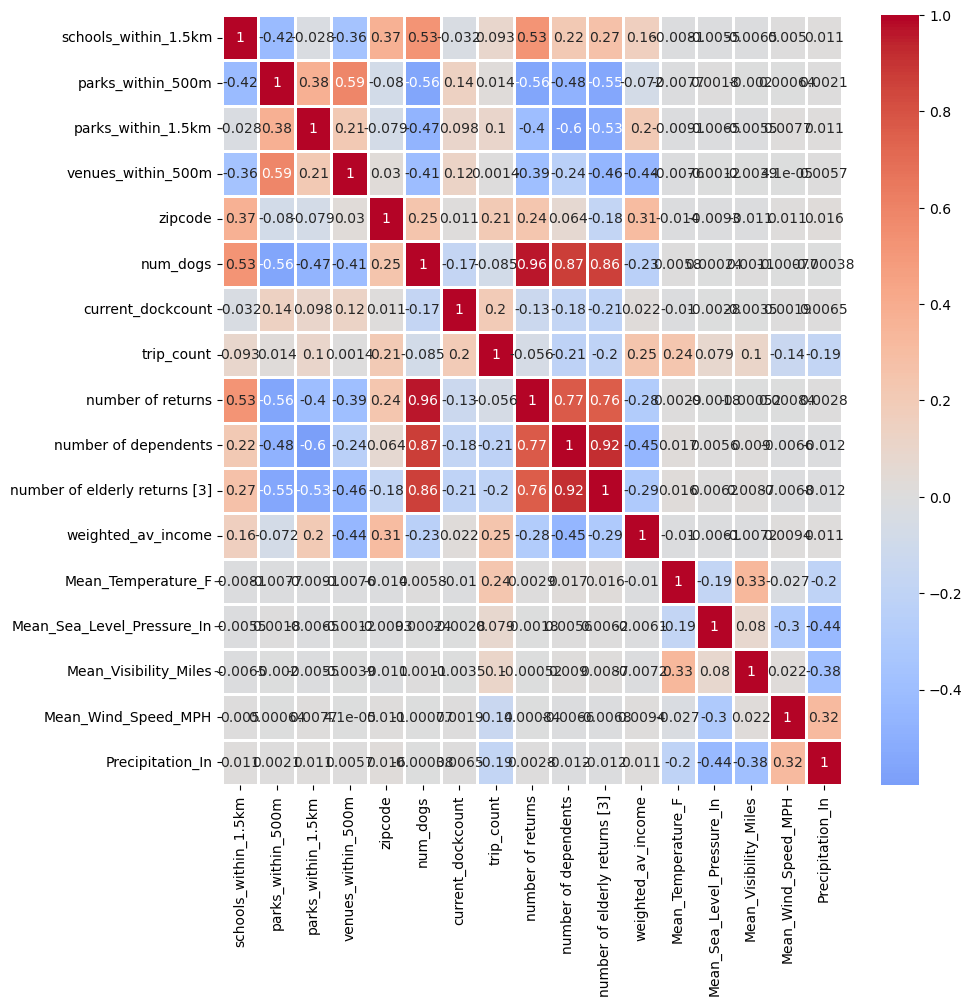

In [606]:
fig, ax =  plt.subplots(figsize = (10,10))


# Plotting the heatmap on the axes
sns.heatmap(df.corr(method='pearson'), 
            annot=True, 
            linewidths=0.8,
            cmap='coolwarm',
            center=0.0,
            ax=ax);

In [607]:
df = df.drop(['num_dogs','number of dependents', 'number of elderly returns [3]', 'number of returns'],axis=1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\3970004556.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'),


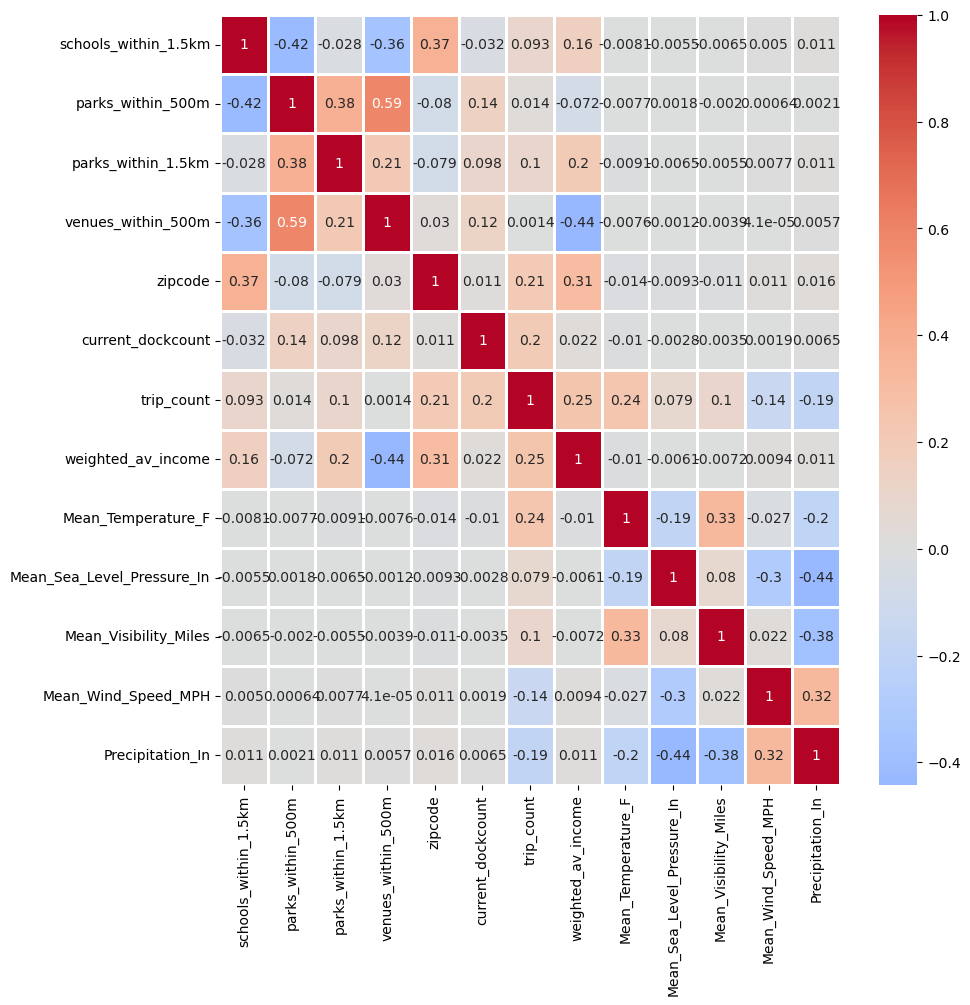

In [608]:
fig, ax =  plt.subplots(figsize = (10,10))

# Plotting the heatmap on the axes
sns.heatmap(df.corr(method='pearson'), 
            annot=True, 
            linewidths=0.8,
            cmap='coolwarm',
            center=0.0,
            ax=ax);

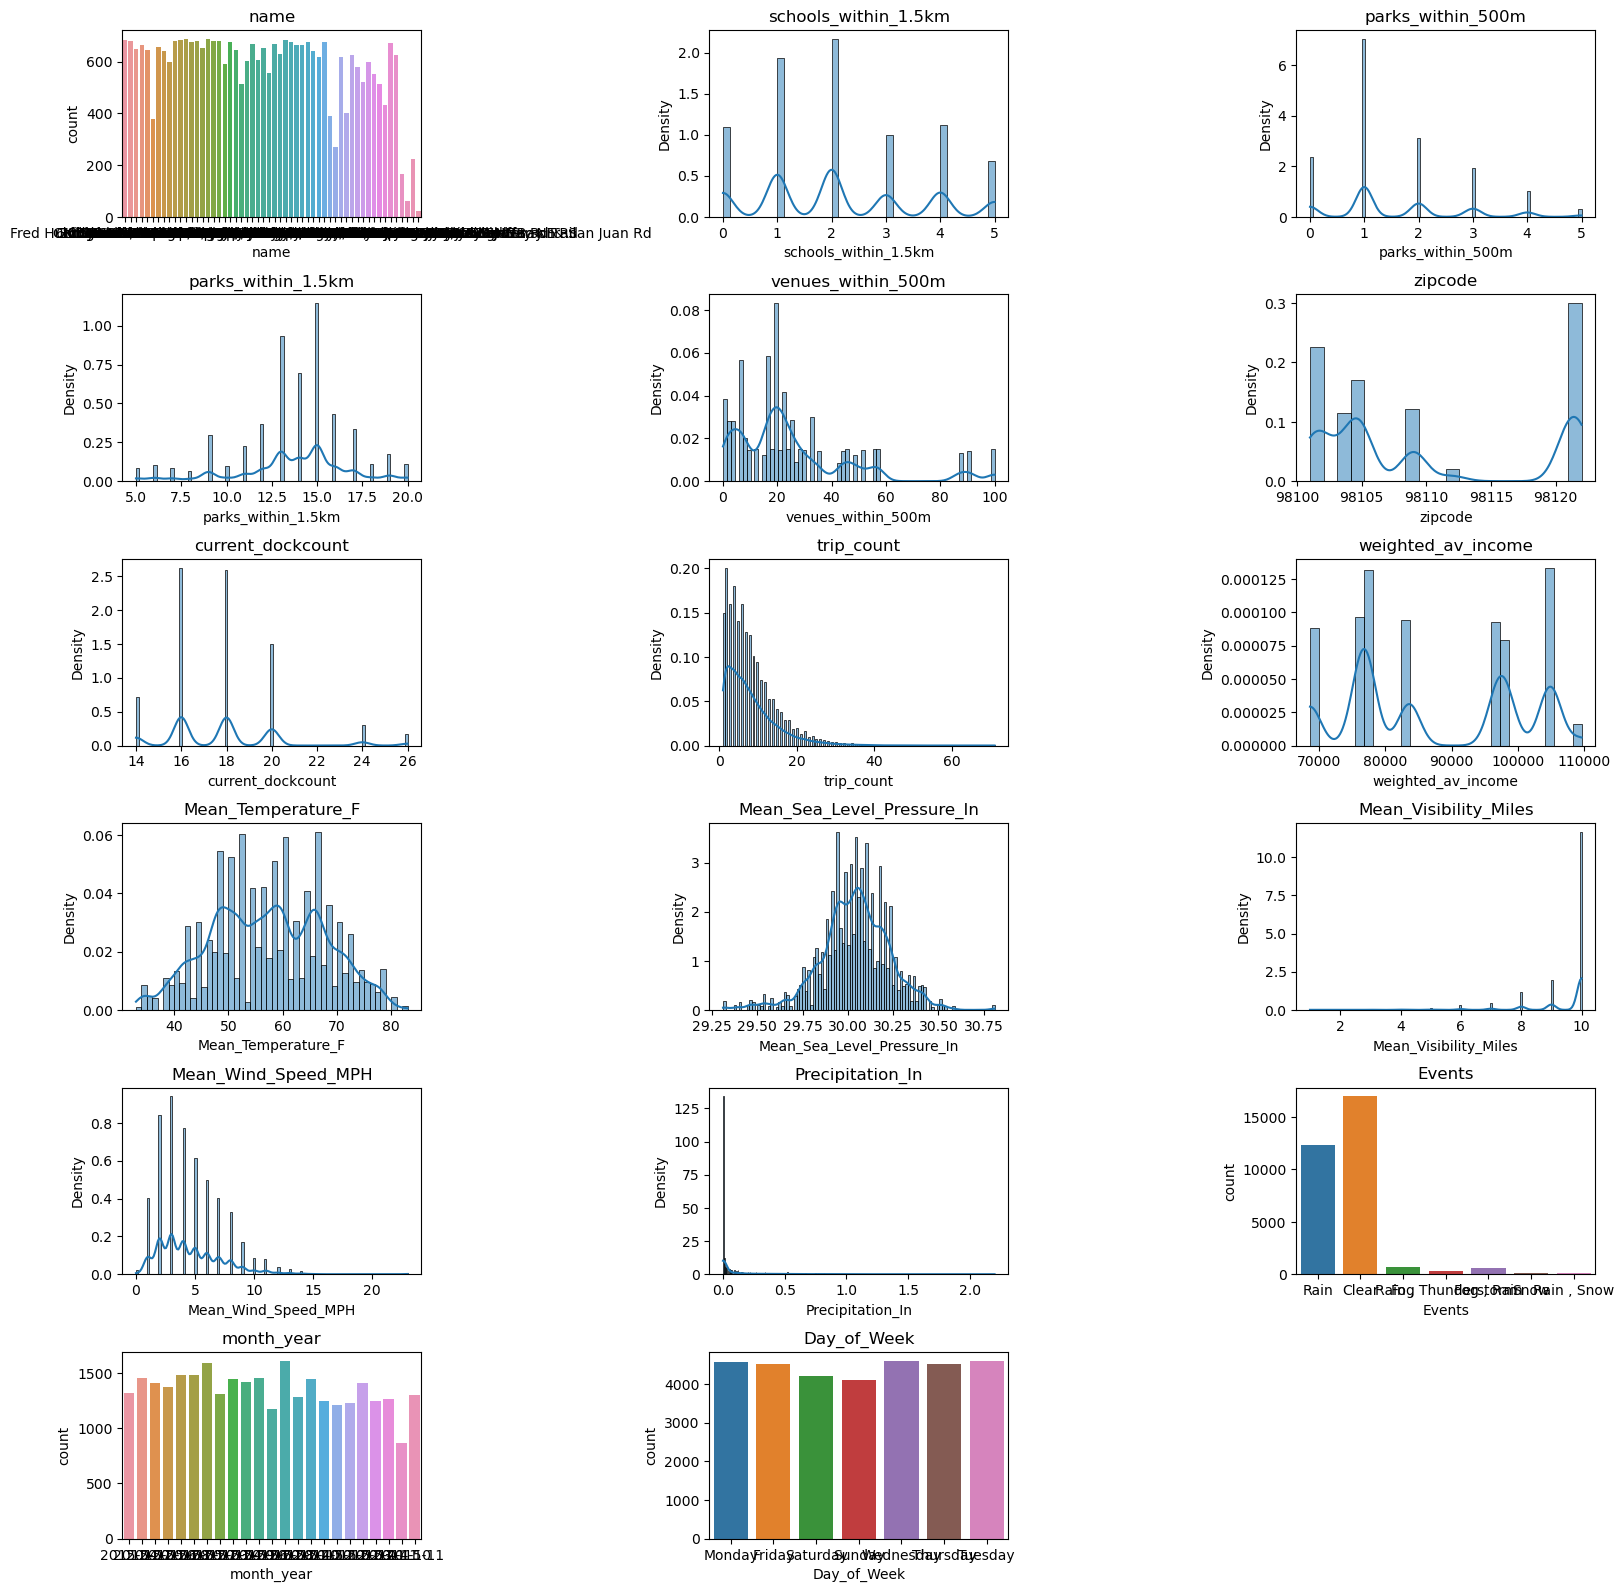

In [609]:
# Histograms
fig = plt.figure(figsize=(16, 16))
for index, col in enumerate(df.columns):
    plt.subplot(6, 3, index + 1)
    
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(df[col]):
        sns.histplot(df[col].dropna(), kde=True, stat="density", linewidth=0.5)
        plt.title(col)
    else:
        # Handle non-numeric data (e.g., categorical)
        sns.countplot(x=col, data=df)
        plt.title(col)
        
fig.tight_layout(pad=1.0)
plt.show()


In [610]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31070 entries, 0 to 31069
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype    
---  ------                      --------------  -----    
 0   name                        31070 non-null  object   
 1   schools_within_1.5km        31070 non-null  int64    
 2   parks_within_500m           31070 non-null  int64    
 3   parks_within_1.5km          31070 non-null  int64    
 4   venues_within_500m          31070 non-null  int64    
 5   zipcode                     31070 non-null  int64    
 6   current_dockcount           31070 non-null  int64    
 7   trip_count                  31070 non-null  int64    
 8   weighted_av_income          31070 non-null  int64    
 9   Mean_Temperature_F          31070 non-null  float64  
 10  Mean_Sea_Level_Pressure_In  31070 non-null  float64  
 11  Mean_Visibility_Miles       31070 non-null  int64    
 12  Mean_Wind_Speed_MPH         31070 non-null  int64    
 13  P

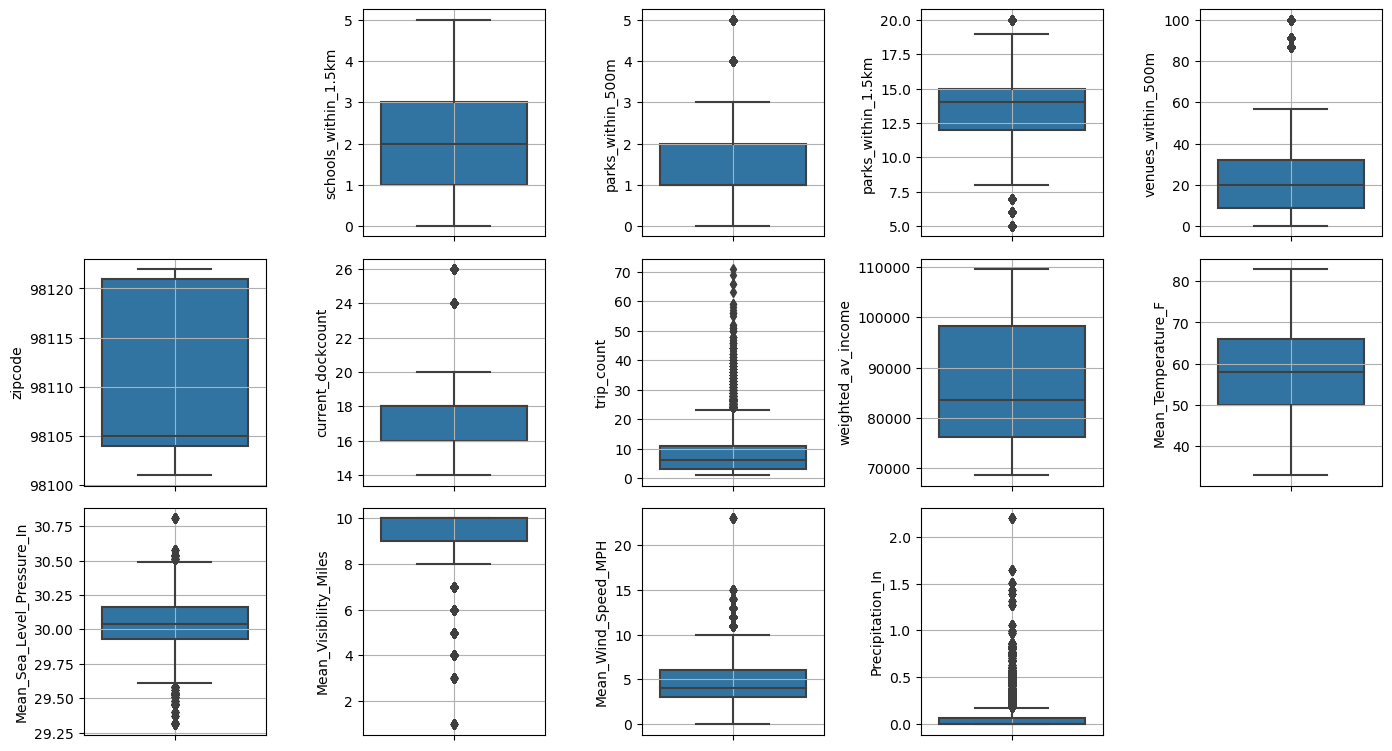

In [611]:
# box plots for outliers also
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(df):
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        plt.subplot(6,5,index+1)
        sns.boxplot(y=col, data=df)
        plt.grid()
fig.tight_layout(pad=1.0)

#### not removed outliers because R2 score drops significantly  on Random Forest model<b>
MAE =  2.8635
MSE =  16.1421
RMSE =  4.0177
R^2 =  0.6277 <b><b>
    
MAE =  2.7102
MSE =  11.9362
RMSE =  3.4549
R^2 =  0.5108

outlier_cols = ['trip_count', 'Mean_Temperature_F', 'Mean_Sea_Level_Pressure_In', 
                'Mean_Visibility_Miles', 'Mean_Wind_Speed_MPH', 'Precipitation_In']


df.columns

Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_filter = ((df[outlier_cols] < (Q1 - 1.5 * IQR)) | (df[outlier_cols] > (Q3 + 1.5 * IQR)))

outlier_rows = outlier_filter.any(axis=1)

df = df[~outlier_rows]



fig = plt.figure(figsize=(14,15))
for index,col in enumerate(df):
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        plt.subplot(6,5,index+1)
        sns.boxplot(y=col, data=df)
        plt.grid()
fig.tight_layout(pad=1.0)

df.info()

In [612]:
df['zipcode'] = df['zipcode'].astype(object)

In [613]:
(df['zipcode']).dtypes

dtype('O')

### encoding the categorical columns using One-Hot Encoding

In [614]:
df = pd.get_dummies(df, columns=['zipcode'])
df.head(1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8716\1413012365.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, columns=['zipcode'])


,name,schools_within_1.5km,parks_within_500m,parks_within_1.5km,venues_within_500m,current_dockcount,trip_count,weighted_av_income,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,Events,month_year,Day_of_Week,zipcode_98101,zipcode_98102,zipcode_98104,zipcode_98105,zipcode_98109,zipcode_98112,zipcode_98121,zipcode_98122
0,3rd Ave & Broad St,2,1,16,20,18,56,104897,60.0,29.91,10,2,0.0,Rain,2015-04,Monday,0,0,0,0,0,0,1,0


In [615]:
df = pd.get_dummies(df, columns=['Events'])
df.head(1)

,name,schools_within_1.5km,parks_within_500m,parks_within_1.5km,venues_within_500m,current_dockcount,trip_count,weighted_av_income,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,month_year,Day_of_Week,zipcode_98101,zipcode_98102,zipcode_98104,zipcode_98105,zipcode_98109,zipcode_98112,zipcode_98121,zipcode_98122,Events_Clear,Events_Fog,"Events_Fog , Rain",Events_Rain,"Events_Rain , Snow","Events_Rain , Thunderstorm",Events_Snow
0,3rd Ave & Broad St,2,1,16,20,18,56,104897,60.0,29.91,10,2,0.0,2015-04,Monday,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [616]:
df = pd.get_dummies(df, columns=['name'])
df.head(1)

,schools_within_1.5km,parks_within_500m,parks_within_1.5km,venues_within_500m,current_dockcount,trip_count,weighted_av_income,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,month_year,Day_of_Week,zipcode_98101,zipcode_98102,zipcode_98104,zipcode_98105,zipcode_98109,zipcode_98112,zipcode_98121,zipcode_98122,Events_Clear,Events_Fog,"Events_Fog , Rain",Events_Rain,"Events_Rain , Snow","Events_Rain , Thunderstorm",Events_Snow,name_12th Ave & E Denny Way,name_12th Ave & E Mercer St,name_12th Ave & NE Campus Pkwy,name_15th Ave E & E Thomas St,name_15th Ave NE & NE 40th St,name_1st Ave & Marion St,name_2nd Ave & Blanchard St,name_2nd Ave & Pine St,name_2nd Ave & Spring St,name_2nd Ave & Vine St,name_3rd Ave & Broad St,name_6th Ave & Blanchard St,name_6th Ave S & S King St,name_7th Ave & Union St,name_9th Ave N & Mercer St,name_Bellevue Ave & E Pine St,name_Broadway and E Denny Way,name_Burke Museum / E Stevens Way NE & Memorial Way NE,name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE,name_Cal Anderson Park / 11th Ave & Pine St,name_Children's Hospital / Sandpoint Way NE & 40th Ave NE,name_City Hall / 4th Ave & James St,name_Dexter Ave N & Aloha St,name_E Blaine St & Fairview Ave E,name_E Harrison St & Broadway Ave E,name_E Pine St & 16th Ave,name_Eastlake Ave E & E Allison St,name_Fred Hutchinson Cancer Research Center / Fairview Ave N & Ward St,name_Harvard Ave & E Pine St,name_Key Arena / 1st Ave N & Harrison St,name_King Street Station Plaza / 2nd Ave Extension S & S Jackson St,name_Lake Union Park / Valley St & Boren Ave N,name_Mercer St & 9th Ave N,name_NE 42nd St & University Way NE,name_NE 47th St & 12th Ave NE,name_NE Pacific St/UW Medical Center,name_Occidental Park / Occidental Ave S & S Washington St,name_PATH / 9th Ave & Westlake Ave,name_Pier 66 / Alaskan Way & Bell St,name_Pier 69 / Alaskan Way & Clay St,name_Pine St & 9th Ave,name_REI / Yale Ave N & John St,name_Republican St & Westlake Ave N,name_Seattle Aquarium / Alaskan Way S & Elliott Bay Trail,name_Seattle University / E Columbia St & 12th Ave,name_Summit Ave & E Denny Way,name_Summit Ave E & E Republican St,name_Terry Ave & Stewart St,name_Thomas St & 5th Ave N,name_UW Engineering Library / E Stevens Way NE & Jefferson Rd,name_UW Intramural Activities Building,name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,name_Union St & 4th Ave,name_Westlake Ave & 6th Ave
0,2,1,16,20,18,56,104897,60.0,29.91,10,2,0.0,2015-04,Monday,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [617]:
df = pd.get_dummies(df, columns=['Day_of_Week'])
df.head(1)

,schools_within_1.5km,parks_within_500m,parks_within_1.5km,venues_within_500m,current_dockcount,trip_count,weighted_av_income,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,month_year,zipcode_98101,zipcode_98102,zipcode_98104,zipcode_98105,zipcode_98109,zipcode_98112,zipcode_98121,zipcode_98122,Events_Clear,Events_Fog,"Events_Fog , Rain",Events_Rain,"Events_Rain , Snow","Events_Rain , Thunderstorm",Events_Snow,name_12th Ave & E Denny Way,name_12th Ave & E Mercer St,name_12th Ave & NE Campus Pkwy,name_15th Ave E & E Thomas St,name_15th Ave NE & NE 40th St,name_1st Ave & Marion St,name_2nd Ave & Blanchard St,name_2nd Ave & Pine St,name_2nd Ave & Spring St,name_2nd Ave & Vine St,name_3rd Ave & Broad St,name_6th Ave & Blanchard St,name_6th Ave S & S King St,name_7th Ave & Union St,name_9th Ave N & Mercer St,name_Bellevue Ave & E Pine St,name_Broadway and E Denny Way,name_Burke Museum / E Stevens Way NE & Memorial Way NE,name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE,name_Cal Anderson Park / 11th Ave & Pine St,name_Children's Hospital / Sandpoint Way NE & 40th Ave NE,name_City Hall / 4th Ave & James St,name_Dexter Ave N & Aloha St,name_E Blaine St & Fairview Ave E,name_E Harrison St & Broadway Ave E,name_E Pine St & 16th Ave,name_Eastlake Ave E & E Allison St,name_Fred Hutchinson Cancer Research Center / Fairview Ave N & Ward St,name_Harvard Ave & E Pine St,name_Key Arena / 1st Ave N & Harrison St,name_King Street Station Plaza / 2nd Ave Extension S & S Jackson St,name_Lake Union Park / Valley St & Boren Ave N,name_Mercer St & 9th Ave N,name_NE 42nd St & University Way NE,name_NE 47th St & 12th Ave NE,name_NE Pacific St/UW Medical Center,name_Occidental Park / Occidental Ave S & S Washington St,name_PATH / 9th Ave & Westlake Ave,name_Pier 66 / Alaskan Way & Bell St,name_Pier 69 / Alaskan Way & Clay St,name_Pine St & 9th Ave,name_REI / Yale Ave N & John St,name_Republican St & Westlake Ave N,name_Seattle Aquarium / Alaskan Way S & Elliott Bay Trail,name_Seattle University / E Columbia St & 12th Ave,name_Summit Ave & E Denny Way,name_Summit Ave E & E Republican St,name_Terry Ave & Stewart St,name_Thomas St & 5th Ave N,name_UW Engineering Library / E Stevens Way NE & Jefferson Rd,name_UW Intramural Activities Building,name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,name_Union St & 4th Ave,name_Westlake Ave & 6th Ave,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday
0,2,1,16,20,18,56,104897,60.0,29.91,10,2,0.0,2015-04,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [618]:
df = pd.get_dummies(df, columns=['month_year'])
df.head(1)

,schools_within_1.5km,parks_within_500m,parks_within_1.5km,venues_within_500m,current_dockcount,trip_count,weighted_av_income,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,zipcode_98101,zipcode_98102,zipcode_98104,zipcode_98105,zipcode_98109,zipcode_98112,zipcode_98121,zipcode_98122,Events_Clear,Events_Fog,"Events_Fog , Rain",Events_Rain,"Events_Rain , Snow","Events_Rain , Thunderstorm",Events_Snow,name_12th Ave & E Denny Way,name_12th Ave & E Mercer St,name_12th Ave & NE Campus Pkwy,name_15th Ave E & E Thomas St,name_15th Ave NE & NE 40th St,name_1st Ave & Marion St,name_2nd Ave & Blanchard St,name_2nd Ave & Pine St,name_2nd Ave & Spring St,name_2nd Ave & Vine St,name_3rd Ave & Broad St,name_6th Ave & Blanchard St,name_6th Ave S & S King St,name_7th Ave & Union St,name_9th Ave N & Mercer St,name_Bellevue Ave & E Pine St,name_Broadway and E Denny Way,name_Burke Museum / E Stevens Way NE & Memorial Way NE,name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE,name_Cal Anderson Park / 11th Ave & Pine St,name_Children's Hospital / Sandpoint Way NE & 40th Ave NE,name_City Hall / 4th Ave & James St,name_Dexter Ave N & Aloha St,...,name_NE 47th St & 12th Ave NE,name_NE Pacific St/UW Medical Center,name_Occidental Park / Occidental Ave S & S Washington St,name_PATH / 9th Ave & Westlake Ave,name_Pier 66 / Alaskan Way & Bell St,name_Pier 69 / Alaskan Way & Clay St,name_Pine St & 9th Ave,name_REI / Yale Ave N & John St,name_Republican St & Westlake Ave N,name_Seattle Aquarium / Alaskan Way S & Elliott Bay Trail,name_Seattle University / E Columbia St & 12th Ave,name_Summit Ave & E Denny Way,name_Summit Ave E & E Republican St,name_Terry Ave & Stewart St,name_Thomas St & 5th Ave N,name_UW Engineering Library / E Stevens Way NE & Jefferson Rd,name_UW Intramural Activities Building,name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,name_Union St & 4th Ave,name_Westlake Ave & 6th Ave,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,month_year_2014-10,month_year_2014-11,month_year_2014-12,month_year_2015-01,month_year_2015-02,month_year_2015-03,month_year_2015-04,month_year_2015-05,month_year_2015-06,month_year_2015-07,month_year_2015-08,month_year_2015-09,month_year_2015-10,month_year_2015-11,month_year_2015-12,month_year_2016-01,month_year_2016-02,month_year_2016-03,month_year_2016-04,month_year_2016-05,month_year_2016-06,month_year_2016-07,month_year_2016-08
0,2,1,16,20,18,56,104897,60.0,29.91,10,2,0.0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [619]:
for elem in df.dtypes:
    print(elem)

int64
int64
int64
int64
int64
int64
int64
float64
float64
int64
int64
float64
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8


### splitting the data

In [773]:
from sklearn.model_selection import train_test_split
X = df.drop(['trip_count'],axis=1)
cols = X.columns
y = df['trip_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

### scaling the data

for simplicity no scaling will be done for the Random Forest model because it can handle unscaled data well

### Random Forest model

In [774]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [775]:
rf = RandomForestRegressor()

rf.fit(X_train[cols], y_train)

y_pred_rf = rf.predict(X_test[cols])

y_pred_rf = y_pred_rf.reshape(-1, 1)

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_test, y_pred_rf)

# Viewing these results
print('MAE = ', mae.round(4))
print('MSE = ', mse.round(4))
print('RMSE = ', rmse.round(4))
print('R^2 = ', r2.round(4)) 

MAE =  2.8632
MSE =  16.1915
RMSE =  4.0239
R^2 =  0.6265


In [805]:
# Display feature importances
feature_importances = pd.DataFrame({'Feature': cols, 'Importance': rf.feature_importances_})

feature_importances.sort_values('Importance', ascending=False).head(20)

,Feature,Importance
6,Mean_Temperature_F,0.127777
14,zipcode_98105,0.089879
7,Mean_Sea_Level_Pressure_In,0.077426
10,Precipitation_In,0.065616
4,current_dockcount,0.047894
9,Mean_Wind_Speed_MPH,0.043418
3,venues_within_500m,0.036738
2,parks_within_1.5km,0.032396
5,weighted_av_income,0.025778
92,month_year_2015-03,0.025518


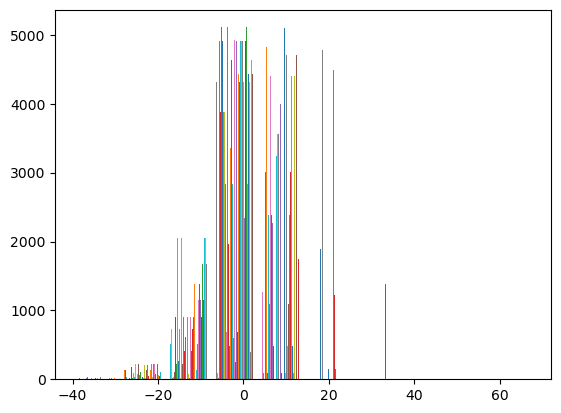

In [624]:
y_test2 = y_test.ravel()
error = y_test2 - y_pred_rf
# histogram showing the distribution of the error
fig, ax = plt.subplots()
ax.hist(error)
plt.show()




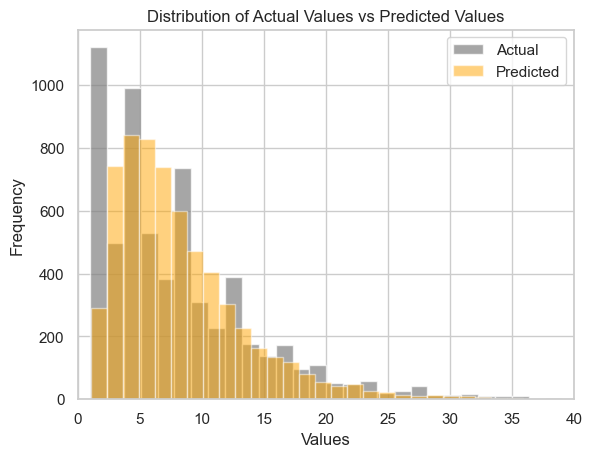

In [777]:
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots()

# Plot histograms with different transparency
ax.hist(y_test2, alpha=0.7, label='Actual', color='grey', bins=50)
ax.hist(y_pred_rf, alpha=0.5, label='Predicted', color='orange', bins=30)

# Add labels and legend
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Actual Values vs Predicted Values')
ax.set_xlim(0,40)
ax.legend()

# Show the plot
plt.show()

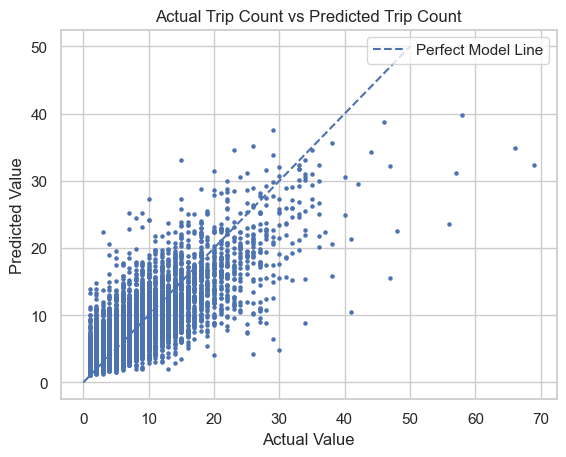

In [778]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rf, s=5)
ax.plot([0,50],[0,50], linestyle= '--', label='Perfect Model Line')
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Actual Trip Count vs Predicted Trip Count')
ax.legend(loc='upper right');

### feature selection using sklearn SelectFromModel to filter features with low relevancy

In [763]:
from sklearn.feature_selection import SelectFromModel

# Select features based on a threshold
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[sfm.get_support()]

In [764]:
selected_features

Index(['schools_within_1.5km', 'parks_within_500m', 'parks_within_1.5km',
       'venues_within_500m', 'current_dockcount', 'weighted_av_income',
       'Mean_Temperature_F', 'Mean_Sea_Level_Pressure_In',
       'Mean_Wind_Speed_MPH', 'Precipitation_In', 'zipcode_98105',
       'name_3rd Ave & Broad St', 'name_E Pine St & 16th Ave',
       'name_Westlake Ave & 6th Ave', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'month_year_2015-01', 'month_year_2015-02',
       'month_year_2015-03', 'month_year_2015-04', 'month_year_2015-05',
       'month_year_2015-07'],
      dtype='object')

In [765]:
X_select = X[['schools_within_1.5km', 'parks_within_500m', 'parks_within_1.5km',
       'venues_within_500m', 'current_dockcount', 'weighted_av_income',
       'Mean_Temperature_F', 'Mean_Sea_Level_Pressure_In',
       'Mean_Wind_Speed_MPH', 'Precipitation_In', 'name_3rd Ave & Broad St',
       'name_E Harrison St & Broadway Ave E', 'name_E Pine St & 16th Ave',
       'name_Westlake Ave & 6th Ave', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'month_year_2015-01', 'month_year_2015-02',
       'month_year_2015-03', 'month_year_2015-04', 'month_year_2015-05',
       'month_year_2015-07', 'zipcode_98105']]
cols = X_select.columns

In [766]:
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.20, random_state =42)

In [767]:
rf = RandomForestRegressor()

rf.fit(X_train[cols], y_train)

y_pred_rf2 = rf.predict(X_test[cols])

y_pred_rf2 = y_pred_rf2.reshape(-1, 1)

mae = mean_absolute_error(y_test, y_pred_rf2)
mse = mean_squared_error(y_test, y_pred_rf2)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_test, y_pred_rf2)

# Viewing these results
print('MAE = ', mae.round(4))
print('MSE = ', mse.round(4))
print('RMSE = ', rmse.round(4))
print('R^2 = ', r2.round(4)) 

MAE =  3.0324
MSE =  17.9445
RMSE =  4.2361
R^2 =  0.5861


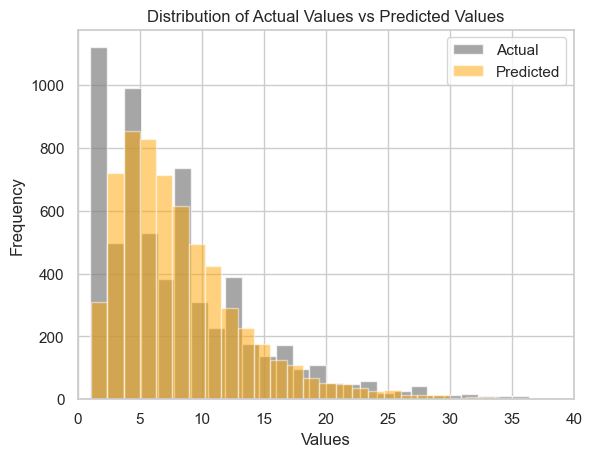

In [768]:
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots()

# Plot histograms with different transparency
ax.hist(y_test, alpha=0.7, label='Actual', color='grey', bins=50)
ax.hist(y_pred_rf2, alpha=0.5, label='Predicted', color='orange', bins=30)

# Add labels and legend
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Actual Values vs Predicted Values')
ax.set_xlim(0,40)
ax.legend()

# Show the plot
plt.show()

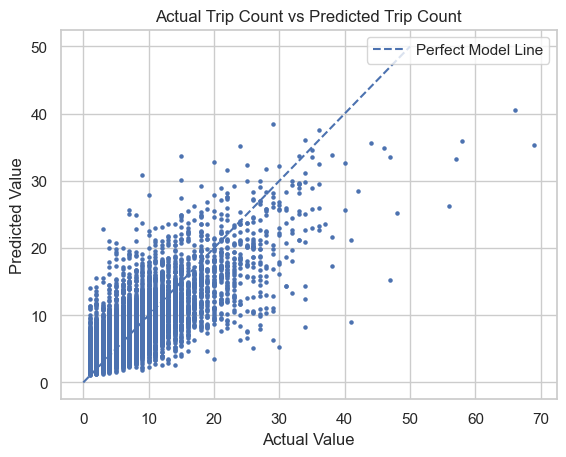

In [772]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_rf2, s=5)
ax.plot([0,50],[0,50], linestyle= '--', label='Perfect Model Line')
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Actual Trip Count vs Predicted Trip Count')
ax.legend(loc='upper right');

## Linear Regression model

### splitting the data

In [779]:
from sklearn.model_selection import train_test_split
X = df.drop(['trip_count'],axis=1)
cols = X.columns
y = df['trip_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

### scaling the data
important for Linear Regression <b>
    
Results without scaling:
MAE =  3.8661
MSE =  27.7064
RMSE =  5.2637
R^2 =  0.3609 <b>

Results with scaling:
MAE =  3.4198
MSE =  22.805
RMSE =  4.7755
R^2 =  0.474

In [780]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaler_target = StandardScaler()

In [781]:
cols_to_scale = ['schools_within_1.5km', 'parks_within_500m', 'parks_within_1.5km',
       'venues_within_500m', 'current_dockcount',
       'weighted_av_income','Mean_Temperature_F',
 'Mean_Sea_Level_Pressure_In',
 'Mean_Visibility_Miles',
 'Mean_Wind_Speed_MPH',
 'Precipitation_In']

In [782]:
X_train.describe().round(3)

,schools_within_1.5km,parks_within_500m,parks_within_1.5km,venues_within_500m,current_dockcount,weighted_av_income,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,zipcode_98101,zipcode_98102,zipcode_98104,zipcode_98105,zipcode_98109,zipcode_98112,zipcode_98121,zipcode_98122,Events_Clear,Events_Fog,"Events_Fog , Rain",Events_Rain,"Events_Rain , Snow","Events_Rain , Thunderstorm",Events_Snow,name_12th Ave & E Denny Way,name_12th Ave & E Mercer St,name_12th Ave & NE Campus Pkwy,name_15th Ave E & E Thomas St,name_15th Ave NE & NE 40th St,name_1st Ave & Marion St,name_2nd Ave & Blanchard St,name_2nd Ave & Pine St,name_2nd Ave & Spring St,name_2nd Ave & Vine St,name_3rd Ave & Broad St,name_6th Ave & Blanchard St,name_6th Ave S & S King St,name_7th Ave & Union St,name_9th Ave N & Mercer St,name_Bellevue Ave & E Pine St,name_Broadway and E Denny Way,name_Burke Museum / E Stevens Way NE & Memorial Way NE,name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE,name_Cal Anderson Park / 11th Ave & Pine St,name_Children's Hospital / Sandpoint Way NE & 40th Ave NE,name_City Hall / 4th Ave & James St,name_Dexter Ave N & Aloha St,name_E Blaine St & Fairview Ave E,...,name_NE 47th St & 12th Ave NE,name_NE Pacific St/UW Medical Center,name_Occidental Park / Occidental Ave S & S Washington St,name_PATH / 9th Ave & Westlake Ave,name_Pier 66 / Alaskan Way & Bell St,name_Pier 69 / Alaskan Way & Clay St,name_Pine St & 9th Ave,name_REI / Yale Ave N & John St,name_Republican St & Westlake Ave N,name_Seattle Aquarium / Alaskan Way S & Elliott Bay Trail,name_Seattle University / E Columbia St & 12th Ave,name_Summit Ave & E Denny Way,name_Summit Ave E & E Republican St,name_Terry Ave & Stewart St,name_Thomas St & 5th Ave N,name_UW Engineering Library / E Stevens Way NE & Jefferson Rd,name_UW Intramural Activities Building,name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,name_Union St & 4th Ave,name_Westlake Ave & 6th Ave,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,month_year_2014-10,month_year_2014-11,month_year_2014-12,month_year_2015-01,month_year_2015-02,month_year_2015-03,month_year_2015-04,month_year_2015-05,month_year_2015-06,month_year_2015-07,month_year_2015-08,month_year_2015-09,month_year_2015-10,month_year_2015-11,month_year_2015-12,month_year_2016-01,month_year_2016-02,month_year_2016-03,month_year_2016-04,month_year_2016-05,month_year_2016-06,month_year_2016-07,month_year_2016-08
count,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,...,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.00,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000
mean,2.142,1.567,13.642,25.471,17.758,87438.665,57.246,30.038,9.475,4.589,0.092,0.108,0.127,0.121,0.179,0.128,0.022,0.184,0.132,0.546,0.023,0.019,0.396,0.003,0.010,0.003,0.021,0.021,0.020,0.022,0.019,0.021,0.021,0.022,0.021,0.022,0.022,0.021,0.018,0.020,0.021,0.019,0.005,0.017,0.019,0.022,0.016,0.019,0.021,0.021,...,0.019,0.007,0.022,0.022,0.001,0.022,0.021,0.022,0.022,0.02,0.021,0.021,0.021,0.012,0.

In [783]:
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale].values)
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale].values)

In [784]:
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

In [785]:
X_train.describe().round(3)

,schools_within_1.5km,parks_within_500m,parks_within_1.5km,venues_within_500m,current_dockcount,weighted_av_income,Mean_Temperature_F,Mean_Sea_Level_Pressure_In,Mean_Visibility_Miles,Mean_Wind_Speed_MPH,Precipitation_In,zipcode_98101,zipcode_98102,zipcode_98104,zipcode_98105,zipcode_98109,zipcode_98112,zipcode_98121,zipcode_98122,Events_Clear,Events_Fog,"Events_Fog , Rain",Events_Rain,"Events_Rain , Snow","Events_Rain , Thunderstorm",Events_Snow,name_12th Ave & E Denny Way,name_12th Ave & E Mercer St,name_12th Ave & NE Campus Pkwy,name_15th Ave E & E Thomas St,name_15th Ave NE & NE 40th St,name_1st Ave & Marion St,name_2nd Ave & Blanchard St,name_2nd Ave & Pine St,name_2nd Ave & Spring St,name_2nd Ave & Vine St,name_3rd Ave & Broad St,name_6th Ave & Blanchard St,name_6th Ave S & S King St,name_7th Ave & Union St,name_9th Ave N & Mercer St,name_Bellevue Ave & E Pine St,name_Broadway and E Denny Way,name_Burke Museum / E Stevens Way NE & Memorial Way NE,name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE,name_Cal Anderson Park / 11th Ave & Pine St,name_Children's Hospital / Sandpoint Way NE & 40th Ave NE,name_City Hall / 4th Ave & James St,name_Dexter Ave N & Aloha St,name_E Blaine St & Fairview Ave E,...,name_NE 47th St & 12th Ave NE,name_NE Pacific St/UW Medical Center,name_Occidental Park / Occidental Ave S & S Washington St,name_PATH / 9th Ave & Westlake Ave,name_Pier 66 / Alaskan Way & Bell St,name_Pier 69 / Alaskan Way & Clay St,name_Pine St & 9th Ave,name_REI / Yale Ave N & John St,name_Republican St & Westlake Ave N,name_Seattle Aquarium / Alaskan Way S & Elliott Bay Trail,name_Seattle University / E Columbia St & 12th Ave,name_Summit Ave & E Denny Way,name_Summit Ave E & E Republican St,name_Terry Ave & Stewart St,name_Thomas St & 5th Ave N,name_UW Engineering Library / E Stevens Way NE & Jefferson Rd,name_UW Intramural Activities Building,name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,name_Union St & 4th Ave,name_Westlake Ave & 6th Ave,Day_of_Week_Friday,Day_of_Week_Monday,Day_of_Week_Saturday,Day_of_Week_Sunday,Day_of_Week_Thursday,Day_of_Week_Tuesday,Day_of_Week_Wednesday,month_year_2014-10,month_year_2014-11,month_year_2014-12,month_year_2015-01,month_year_2015-02,month_year_2015-03,month_year_2015-04,month_year_2015-05,month_year_2015-06,month_year_2015-07,month_year_2015-08,month_year_2015-09,month_year_2015-10,month_year_2015-11,month_year_2015-12,month_year_2016-01,month_year_2016-02,month_year_2016-03,month_year_2016-04,month_year_2016-05,month_year_2016-06,month_year_2016-07,month_year_2016-08
count,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,...,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.00,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000,24856.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.108,0.127,0.121,0.179,0.128,0.022,0.184,0.132,0.546,0.023,0.019,0.396,0.003,0.010,0.003,0.021,0.021,0.020,0.022,0.019,0.021,0.021,0.022,0.021,0.022,0.022,0.021,0.018,0.020,0.021,0.019,0.005,0.017,0.019,0.022,0.016,0.019,0.021,0.021,...,0.019,0.007,0.022,0.022,0.001,0.022,0.021,0.022,0.022,0.02,0.021,0.021,0.021,0.012,0.002,0

In [786]:
print(y_train.std(), y_train.mean().round(1))
print(y_test.std().round(2), y_test.mean().round(1))

1.0 0.0
1.0 -0.0


## Build the model

In [787]:
cols = X.columns

In [788]:
from sklearn.linear_model import LinearRegression


# call the method
regressor = LinearRegression( )

# Fit the model
regressor.fit(X_train[cols],y_train)

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])



In [789]:
# first we need to reverse the transformation so we have meanginful results
y_true = scaler_target.inverse_transform(y_test)
y_pred = scaler_target.inverse_transform(y_pred)

# Calculating the errors
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred)

# Viewing these results
print('MAE = ', mae.round(4))
print('MSE = ', mse.round(4))
print('RMSE = ', rmse.round(4))
print('R^2 = ', r2.round(4)) 

MAE =  3.4161
MSE =  22.793
RMSE =  4.7742
R^2 =  0.4743


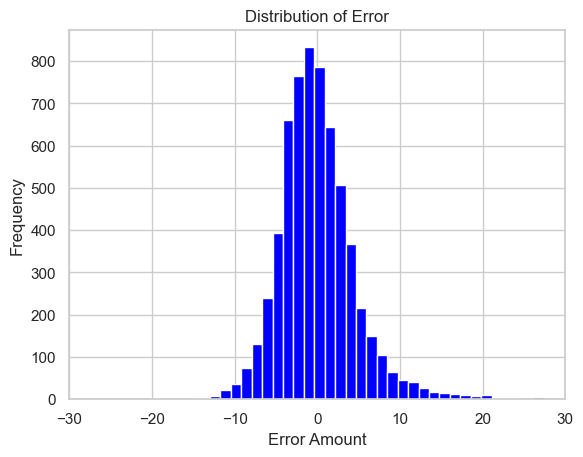

In [790]:
error = y_true - y_pred


# histogram showing the distribution of the error
sns.set(style="whitegrid")
fig, ax = plt.subplots()
ax.hist(error,color='blue', bins=50)
ax.set_xlabel('Error Amount')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Error')
ax.set_xlim(-30,30)
plt.show()

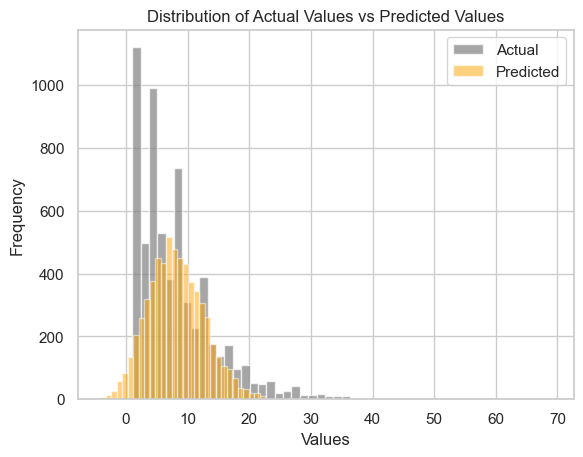

In [791]:
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots()

# Plot histograms with different transparency
ax.hist(y_true, alpha=0.7, label='Actual', color='grey', bins=50)
ax.hist(y_pred, alpha=0.5, label='Predicted', color='orange', bins=30)

# Add labels and legend
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Actual Values vs Predicted Values')
ax.legend()

# Show the plot
plt.show()

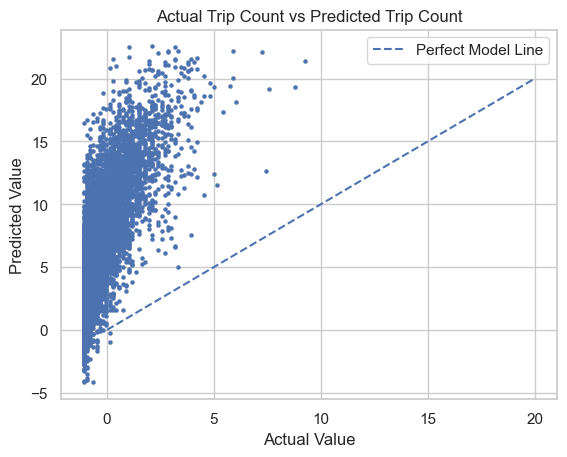

In [792]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=5)
ax.plot([0,20],[0,20], linestyle= '--', label='Perfect Model Line')
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Actual Trip Count vs Predicted Trip Count')
ax.legend();

### Remove Outliers

In [793]:
outlier_cols = ['trip_count', 'Mean_Temperature_F', 'Mean_Sea_Level_Pressure_In', 
                'Mean_Visibility_Miles', 'Mean_Wind_Speed_MPH', 'Precipitation_In']


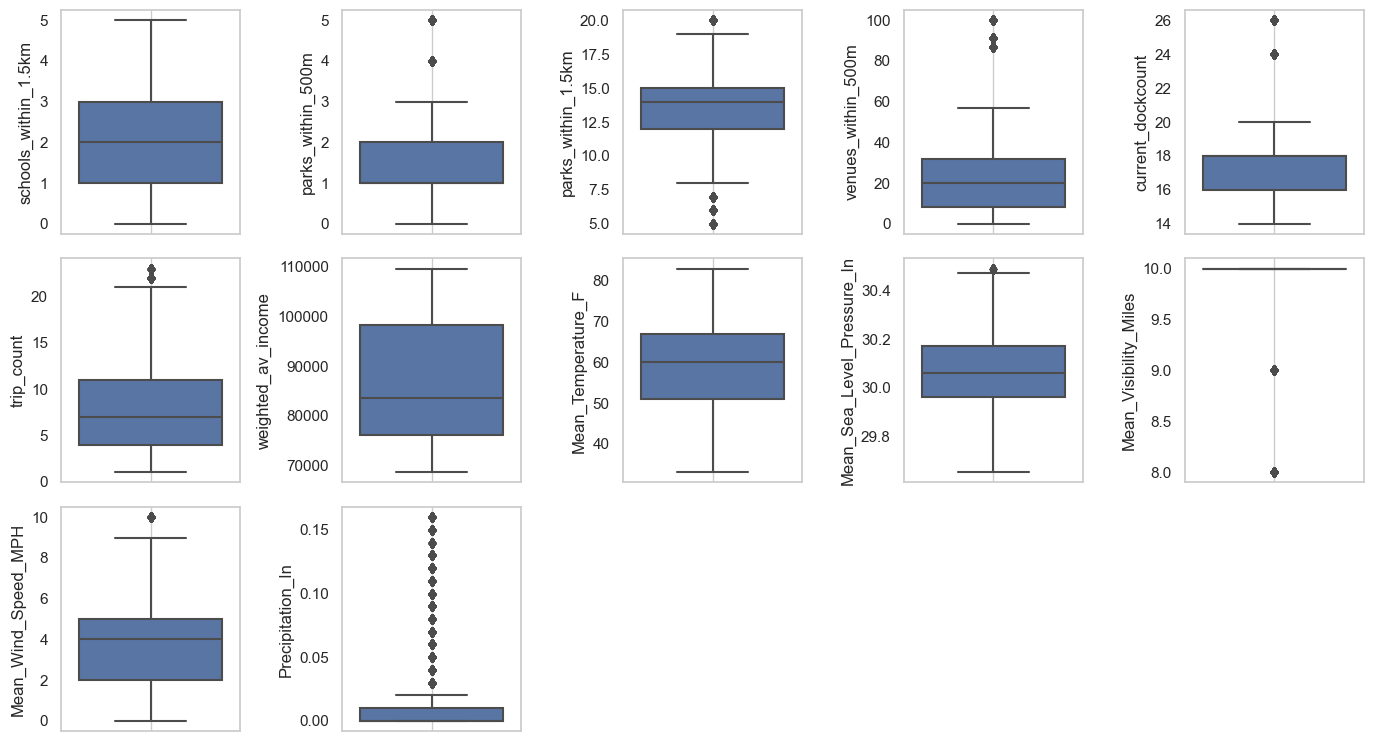

In [794]:
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_filter = ((df[outlier_cols] < (Q1 - 1.5 * IQR)) | (df[outlier_cols] > (Q3 + 1.5 * IQR)))

outlier_rows = outlier_filter.any(axis=1)

df_clean = df[~outlier_rows]



fig = plt.figure(figsize=(14,15))
for index,col in enumerate(df_clean):
    if df_clean[col].dtype == 'int64' or df_clean[col].dtype == 'float64':
        plt.subplot(6,5,index+1)
        sns.boxplot(y=col, data=df_clean)
        plt.grid()
fig.tight_layout(pad=1.0)

In [795]:
df_clean.info() # total data points dropped from 31070 to 22931

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22931 entries, 113 to 31069
Columns: 111 entries, schools_within_1.5km to month_year_2016-08
dtypes: float64(3), int64(9), uint8(99)
memory usage: 4.4 MB


## Rebuild linear reg model without outliers

In [796]:
cols = X.columns

In [797]:
from sklearn.model_selection import train_test_split
X = df_clean.drop(['trip_count'],axis=1)
cols = X.columns
y = df_clean['trip_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

In [798]:
cols_to_scale = ['schools_within_1.5km', 'parks_within_500m', 'parks_within_1.5km',
       'venues_within_500m', 'current_dockcount',
       'weighted_av_income','Mean_Temperature_F',
 'Mean_Sea_Level_Pressure_In',
 'Mean_Visibility_Miles',
 'Mean_Wind_Speed_MPH',
 'Precipitation_In']

In [799]:
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale].values)
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale].values)
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

In [800]:
# call the method
regressor = LinearRegression( )

# Fit the model
regressor.fit(X_train[cols],y_train)

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])



In [801]:
# first we need to reverse the transformation so we have meanginful results
y_true = scaler_target.inverse_transform(y_test)
y_pred = scaler_target.inverse_transform(y_pred)

# Calculating the errors
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred)

# Viewing these results
print('MAE = ', mae.round(4))
print('MSE = ', mse.round(4))
print('RMSE = ', rmse.round(4))
print('R^2 = ', r2.round(4)) 

MAE =  3.0448
MSE =  15.2183
RMSE =  3.9011
R^2 =  0.4407


results with outliers: 
MAE =  3.4198
MSE =  22.805
RMSE =  4.7755
R^2 =  0.474
- results with outliers has a slightly higher R^2 but much more error

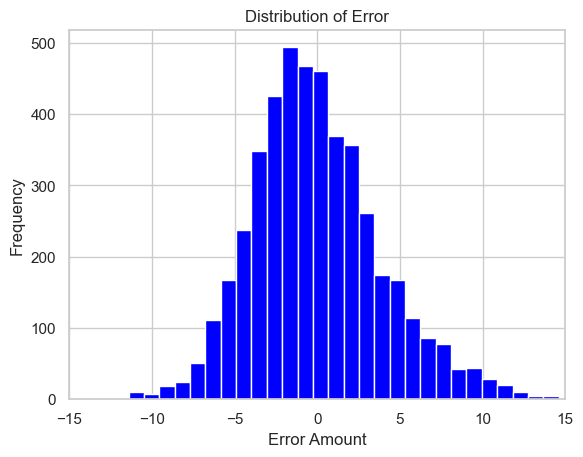

In [802]:
error = y_true - y_pred

# histogram showing the distribution of the error
sns.set(style="whitegrid")
fig, ax = plt.subplots()
ax.hist(error,color='blue', bins=30)
ax.set_xlabel('Error Amount')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Error')
ax.set_xlim(-15,15)
plt.show()

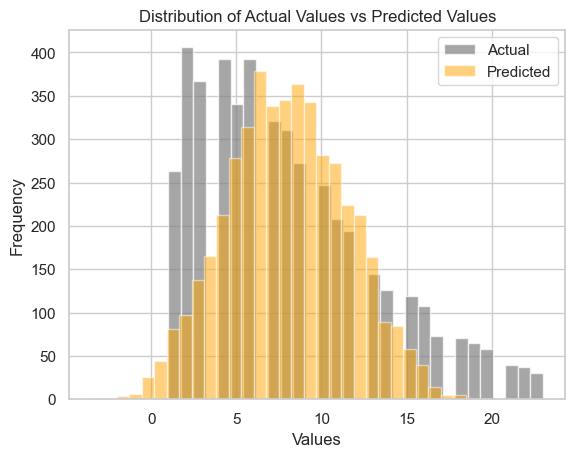

In [803]:
sns.set(style="whitegrid")

# Create subplots
fig, ax = plt.subplots()

# Plot histograms with different transparency
ax.hist(y_true, alpha=0.7, label='Actual', color='grey', bins=30)
ax.hist(y_pred, alpha=0.5, label='Predicted', color='orange', bins=30)

# Add labels and legend
ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Actual Values vs Predicted Values')
ax.legend()

# Show the plot
plt.show()

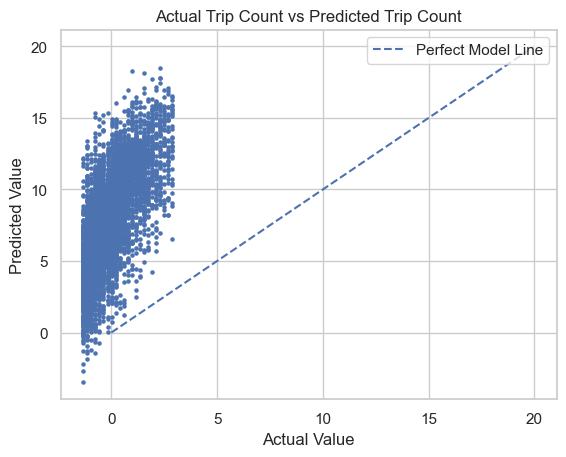

In [804]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, s=5)
ax.plot([0,20],[0,20], linestyle= '--', label='Perfect Model Line')
ax.set_xlabel('Actual Value')
ax.set_ylabel('Predicted Value')
ax.set_title('Actual Trip Count vs Predicted Trip Count')
ax.legend(loc='upper right');